In [3]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns

In [5]:
df=pd.read_csv("patient.csv",header=None)
df.rename(columns={0: 'Patient_id', 1: 'Patient_name', 2: 'patient_gender',3: 'patient_birth_date',4: 'patient_phone',5: 'disease_name',6:'city',7:'hospital_id'}, inplace=True)

In [6]:
df

,Patient_id,Patient_name,patient_gender,patient_birth_date,patient_phone,disease_name,city,hospital_id
0,187158,Harbir,Female,1960-02-24,+91 0112009318,Galactosemia,Rourkela,H1001
1,112766,Brahmdev,Female,1955-05-30,+91 1727749552,Bladder cancer,Tiruvottiyur,H1016
2,199252,Ujjawal,Male,1965-12-31,+91 8547451606,Kidney cancer,Berhampur,H1009
3,133424,Ballari,Female,1979-06-11,+91 0106026841,Suicide,Bihar Sharif,H1017
4,172579,Devnath,Female,1982-02-22,+91 1868774631,Food allergy,Bidhannagar,H1019
...,...,...,...,...,...,...,...,...
65,191132,Dipesh,Female,2014-05-21,+91 5851958964,Glaucoma,Kochi,H1016
66,105686,NaN,Male,2012-01-25,+91 7061843400,Hepatitis,Kolhapur,H1008
67,160140,Kishan,Male,1955-06-30,+91 9067652693,Rett Syndrome,Srikakulam,H1002
68,114252,NaN,Female,1965-05-30,+91 4984346995,Diabetes,Ambarnath,H1014


In [7]:
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

In [8]:
from datetime import datetime, date

In [9]:
df['Age'] = df['patient_birth_date'].apply(age)

In [10]:
df

,Patient_id,Patient_name,patient_gender,patient_birth_date,patient_phone,disease_name,city,hospital_id,Age
0,187158,Harbir,Female,1960-02-24,+91 0112009318,Galactosemia,Rourkela,H1001,62
1,112766,Brahmdev,Female,1955-05-30,+91 1727749552,Bladder cancer,Tiruvottiyur,H1016,66
2,199252,Ujjawal,Male,1965-12-31,+91 8547451606,Kidney cancer,Berhampur,H1009,56
3,133424,Ballari,Female,1979-06-11,+91 0106026841,Suicide,Bihar Sharif,H1017,42
4,172579,Devnath,Female,1982-02-22,+91 1868774631,Food allergy,Bidhannagar,H1019,40
...,...,...,...,...,...,...,...,...,...
65,191132,Dipesh,Female,2014-05-21,+91 5851958964,Glaucoma,Kochi,H1016,8
66,105686,NaN,Male,2012-01-25,+91 7061843400,Hepatitis,Kolhapur,H1008,10
67,160140,Kishan,Male,1955-06-30,+91 9067652693,Rett Syndrome,Srikakulam,H1002,66
68,114252,NaN,Female,1965-05-30,+91 4984346995,Diabetes,Ambarnath,H1014,56


In [11]:
df['Age']

0     62
1     66
2     56
3     42
4     40
      ..
65     8
66    10
67    66
68    56
69    64
Name: Age, Length: 70, dtype: int64

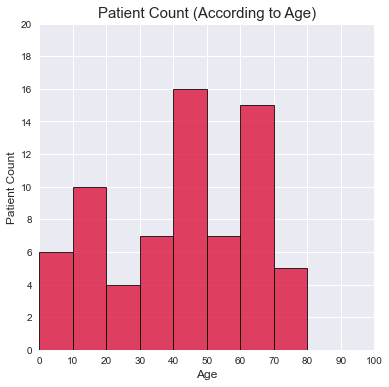

In [13]:
plt.figure(figsize=(6,6))
bins=[0,10,20,30,40,50,60,70,80,90,100,110]
a=df['Age']
plt.hist(a, bins, facecolor='crimson', alpha=0.8, edgecolor='k', linewidth=1)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Patient Count",fontsize=12)
plt.locator_params('y', nbins=12)
plt.ylim(ymin=0,ymax=20)
plt.locator_params('x', nbins=10)
plt.xlim(xmin=0,xmax=100)
plt.title("Patient Count (According to Age)",fontsize=15)
plt.savefig('processed_data_graph/PatientCount(Age).png')

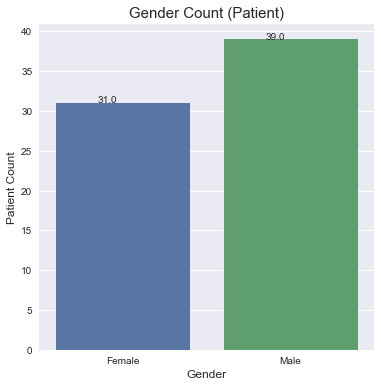

In [14]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x='patient_gender',data=df)
ax.set_ylabel("Patient Count", fontsize = 12)
ax.set_xlabel("Gender", fontsize = 12)
ax.set_title("Gender Count (Patient)", fontsize=15)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.savefig('processed_data_graph/GenderCount(Patient).png')

In [15]:
js=pd.read_json('claims.json')

In [16]:
js

,claim_id,patient_id,disease_name,SUB_ID,Claim_Or_Rejected,claim_type,claim_amount,claim_date
0,0,187158,Galactosemia,SUBID10000,N,claims of value,79874,1949-03-14
1,1,112766,Bladder cancer,SUBID10001,N,claims of policy,151142,1970-03-16
2,2,199252,Kidney cancer,SUBID10002,N,claims of value,59924,2008-02-03
3,3,133424,Suicide,SUBID10003,N,claims of fact,143120,1995-02-08
4,4,172579,Food allergy,SUBID10004,Y,claims of value,168634,1967-05-23
...,...,...,...,...,...,...,...,...
65,65,191132,Glaucoma,SUBID1065,Y,claims of policy,81980,1969-05-31
66,66,105686,Hepatitis,SUBID10066,N,claims of fact,13667,1957-09-12
67,67,160140,Rett Syndrome,SUBID1067,N,claims of value,109433,1944-12-25
68,68,114252,Diabetes,SUBID10068,N,claims of policy,152901,1948-02-13


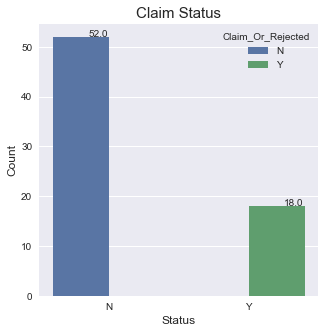

In [17]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Claim_Or_Rejected',data=js,hue='Claim_Or_Rejected')
ax.set_ylabel("Count",fontsize=12)
ax.set_xlabel("Status", fontsize=12)
ax.set_title("Claim Status",fontsize=15)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.savefig('processed_data_graph/ClaimStatus.png')

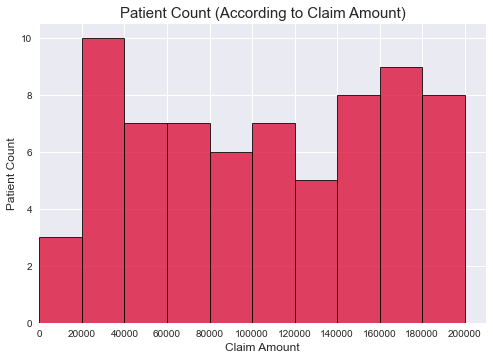

In [18]:
bins=[0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,220000,240000]
a=js['claim_amount']
plt.hist(a, bins, facecolor='crimson', alpha=0.8, edgecolor='k', linewidth=1)
plt.xlabel("Claim Amount",fontsize=12)
plt.ylabel("Patient Count",fontsize=12)
plt.locator_params('x', nbins=12)
plt.xlim(xmin=0,xmax=210000)
plt.title("Patient Count (According to Claim Amount)",fontsize=15)
plt.savefig('processed_data_graph/Patient_count(claimAmt).png')

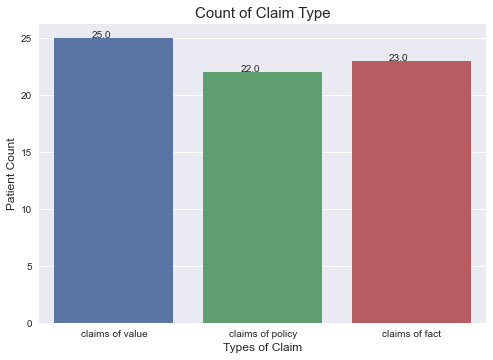

In [19]:
ax=sns.countplot(x='claim_type',data=js)
ax.set_ylabel("Patient Count",fontsize=12)
ax.set_xlabel("Types of Claim", fontsize=12)
ax.set_title("Count of Claim Type",fontsize=15)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.savefig('processed_data_graph/CountofClaimType.png')

In [20]:
df1=pd.read_csv('subscriber.csv')

In [21]:
df1

,Unnamed: 0,sub _id,first_name,last_name,Street,Birth_date,Gender,Phone,Country,City,Zip Code,Subgrp_id,Elig_ind,eff_date,term_date
0,0,SUBID10000,Harbir,Vishwakarma,Baria Marg,30-06-1924,Female,+91 0112009318,India,Rourkela,767058,S107,Y,30-06-1944,14-01-1954
1,1,SUBID10001,Brahmdev,Sonkar,Lala Marg,20-12-1948,Female,+91 1727749552,India,Tiruvottiyur,34639,S105,Y,20-12-1968,16-05-1970
2,2,SUBID10002,Ujjawal,Devi,Mammen Zila,16-04-1980,Male,+91 8547451606,India,Berhampur,914455,S106,N,16-04-2000,04-05-2008
3,3,SUBID10003,Ballari,Mishra,Sahni Zila,25-09-1969,Female,+91 0106026841,India,Bihar Sharif,91481,S104,N,25-09-1989,05-06-1995
4,4,SUBID10004,Devnath,Srivastav,Magar Zila,01-05-1946,Female,+91 1868774631,India,Bidhannagar,531742,S110,N,01-05-1966,09-12-1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,SUBID10095,Ekaaksh,Rai,Bansal Ganj,02-12-1933,Others,NaN,India,Pimpri-Chinchwad,158186,S107,N,02-12-1953,29-07-1960
96,96,SUBID10096,Chanak,Sonkar,Kaur,07-04-1959,Others,+91 7284540687,India,Raurkela Industrial Township,899590,S101,Y,07-04-1979,07-03-1986
97,97,SUBID10097,NaN,Sonkar,Rana Ganj,04-02-1940,Others,+91 8908240160,India,Mira-Bhayandar,896586,S107,Y,04-02-1960,12-01-1965
98,98,SUBID1098,Pushkar,Kumar,Sodhi Zila,05-10-1934,Others,+91 8956368286,India,Korba,910732,S107,Y,05-10-1954,05-04-1961


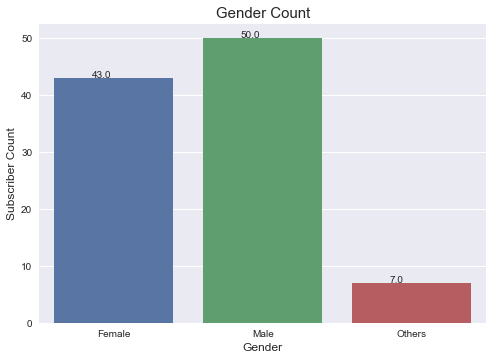

In [22]:
ax=sns.countplot(x='Gender',data=df1)
ax.set_ylabel("Subscriber Count", fontsize = 12)
ax.set_xlabel("Gender", fontsize = 12)
ax.set_title("Gender Count", fontsize=15)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    
plt.savefig('processed_data_graph/Subs_GenderCount.png')

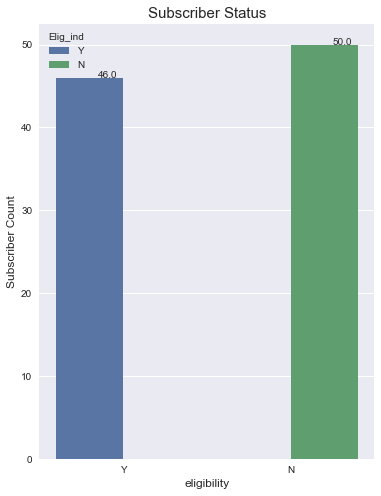

In [23]:
plt.figure(figsize = (6,8))
ax=sns.countplot(x='Elig_ind',data=df1,hue='Elig_ind')
ax.set_ylabel("Subscriber Count", fontsize = 12)
ax.set_xlabel("eligibility", fontsize = 12)
ax.set_title("Subscriber Status", fontsize=15)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.savefig('processed_data_graph/Subs_Status.png')

In [24]:
def age1(born):
    born = datetime.strptime(born, "%d-%m-%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

In [25]:
df1['Age'] = df1['Birth_date'].apply(age1)

In [26]:
df1

,Unnamed: 0,sub _id,first_name,last_name,Street,Birth_date,Gender,Phone,Country,City,Zip Code,Subgrp_id,Elig_ind,eff_date,term_date,Age
0,0,SUBID10000,Harbir,Vishwakarma,Baria Marg,30-06-1924,Female,+91 0112009318,India,Rourkela,767058,S107,Y,30-06-1944,14-01-1954,97
1,1,SUBID10001,Brahmdev,Sonkar,Lala Marg,20-12-1948,Female,+91 1727749552,India,Tiruvottiyur,34639,S105,Y,20-12-1968,16-05-1970,73
2,2,SUBID10002,Ujjawal,Devi,Mammen Zila,16-04-1980,Male,+91 8547451606,India,Berhampur,914455,S106,N,16-04-2000,04-05-2008,42
3,3,SUBID10003,Ballari,Mishra,Sahni Zila,25-09-1969,Female,+91 0106026841,India,Bihar Sharif,91481,S104,N,25-09-1989,05-06-1995,52
4,4,SUBID10004,Devnath,Srivastav,Magar Zila,01-05-1946,Female,+91 1868774631,India,Bidhannagar,531742,S110,N,01-05-1966,09-12-1970,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,SUBID10095,Ekaaksh,Rai,Bansal Ganj,02-12-1933,Others,NaN,India,Pimpri-Chinchwad,158186,S107,N,02-12-1953,29-07-1960,88
96,96,SUBID10096,Chanak,Sonkar,Kaur,07-04-1959,Others,+91 7284540687,India,Raurkela Industrial Township,899590,S101,Y,07-04-1979,07-03-1986,63
97,97,SUBID10097,NaN,Sonkar,Rana Ganj,04-02-1940,Others,+91 8908240160,India,Mira-Bhayandar,896586,S107,Y,04-02-1960,12-01-1965,82
98,98,SUBID1098,Pushkar,Kumar,Sodhi Zila,05-10-1934,Others,+91 8956368286,India,Korba,910732,S107,Y,05-10-1954,05-04-1961,87


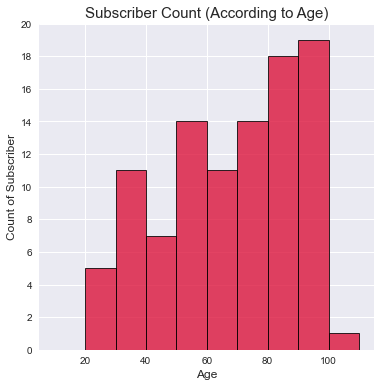

In [27]:
plt.figure(figsize=(6,6))
bins=[10,20,30,40,50,60,70,80,90,100,110]
a=df1['Age']
plt.hist(a, bins, facecolor='crimson', alpha=0.8, edgecolor='k', linewidth=1)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Count of Subscriber",fontsize=12)
plt.locator_params('y', nbins=12)
plt.ylim(ymin=0,ymax=20)
plt.title("Subscriber Count (According to Age)",fontsize=15)
plt.savefig('processed_data_graph/Subs_Count(age).png')